# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#equator defines the line of zero latitude.

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90, high=90, size=1800)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1800)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)


709

In [7]:
#create data frames for weather data
cities_df = pd.DataFrame(cities)
cities_df.columns=['city']
cities_df.head()

,city
0,muzquiz
1,benalla
2,jacareacanga
3,roma
4,san patricio


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#create base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#city iteration varialble
i=0

#for loop to update the URL using each city from the Cities dataFrame
for index, row in cities_df.iterrows():
    #sleep the api call to avoid going over limits
    time.sleep(1.02)
    #error handling
    try:
        #Use If statement to stop when done with cities
        if i <= len(cities):
            #outputs temperature in fahrenheit
            units = "imperial"
            
            city = cities[i]
           
            #update url with the city
            query_url = f"{url}appid={api_key}&q={city}&units={units}"
    
            # Get weather data
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()
    
            #put the json data into a variable
            coord_lon = weather_json["coord"]["lon"]
            coord_lat = weather_json["coord"]["lat"]
            country = weather_json['sys']["country"]
            date = weather_json["dt"]
            temperature = weather_json["main"]["temp"]
            humidity = weather_json["main"]["humidity"]
            clouds = weather_json["clouds"]["all"]
            max_temp = weather_json["main"]["temp_max"]
            wind_speed = weather_json["wind"]["speed"]
            
            #convert the weather_json date value
            datetime = date
            datetime = pd.to_datetime(datetime, unit='s')
            
            #put the data from the variable into the dataframe column
            cities_df.loc[index, "Lng"] = coord_lon
            cities_df.loc[index, "Lat"] = coord_lat
            cities_df.loc[index, "Country"] = country
            cities_df.loc[index, "Date"] = datetime
            cities_df.loc[index, "Temperature"] = temperature
            cities_df.loc[index, "Humidity"] = humidity
            cities_df.loc[index, "Cloudiness"] = clouds
            cities_df.loc[index, "Max Temp"] = max_temp
            cities_df.loc[index, "Wind speed"] = wind_speed
            #cities_df.loc[index, "sea_level"] = sea_level
    
            #print the data has loaded or print the error message
            print(f'Done loading row {i}. City: {city}')
            print(f'--------------------------------------')
         
            i+=1
    
    except (KeyError, IndexError):
        print(f"Sorry, {city} cannot be found. Row number {i}")
        print(f'----------------------------------------------')
        i+=1

Sorry, muzquiz cannot be found. Row number 0
----------------------------------------------
Done loading row 1. City: benalla
--------------------------------------
Done loading row 2. City: jacareacanga
--------------------------------------
Done loading row 3. City: roma
--------------------------------------
Done loading row 4. City: san patricio
--------------------------------------
Done loading row 5. City: jamestown
--------------------------------------
Done loading row 6. City: muros
--------------------------------------
Done loading row 7. City: port alfred
--------------------------------------
Done loading row 8. City: pevek
--------------------------------------
Done loading row 9. City: iqaluit
--------------------------------------
Done loading row 10. City: ushuaia
--------------------------------------
Done loading row 11. City: bagdarin
--------------------------------------
Done loading row 12. City: busselton
--------------------------------------
Sorry, burkhala c

Done loading row 105. City: obo
--------------------------------------
Done loading row 106. City: georgetown
--------------------------------------
Done loading row 107. City: tuktoyaktuk
--------------------------------------
Done loading row 108. City: hobart
--------------------------------------
Done loading row 109. City: brae
--------------------------------------
Done loading row 110. City: cayenne
--------------------------------------
Done loading row 111. City: howard springs
--------------------------------------
Done loading row 112. City: nantucket
--------------------------------------
Done loading row 113. City: provideniya
--------------------------------------
Done loading row 114. City: maniitsoq
--------------------------------------
Done loading row 115. City: saint-augustin
--------------------------------------
Done loading row 116. City: atuona
--------------------------------------
Done loading row 117. City: constitucion
--------------------------------------


Done loading row 211. City: bonthe
--------------------------------------
Sorry, tumannyy cannot be found. Row number 212
----------------------------------------------
Done loading row 213. City: newport
--------------------------------------
Done loading row 214. City: san vicente
--------------------------------------
Done loading row 215. City: port hardy
--------------------------------------
Sorry, karauzyak cannot be found. Row number 216
----------------------------------------------
Done loading row 217. City: camapua
--------------------------------------
Done loading row 218. City: olga
--------------------------------------
Done loading row 219. City: charters towers
--------------------------------------
Done loading row 220. City: dillon
--------------------------------------
Done loading row 221. City: fortuna
--------------------------------------
Done loading row 222. City: taywarah
--------------------------------------
Done loading row 223. City: kodiak
-------------

Done loading row 317. City: biak
--------------------------------------
Done loading row 318. City: husavik
--------------------------------------
Sorry, yirol cannot be found. Row number 319
----------------------------------------------
Done loading row 320. City: calderitas
--------------------------------------
Done loading row 321. City: tessalit
--------------------------------------
Done loading row 322. City: shahr-e babak
--------------------------------------
Done loading row 323. City: opole lubelskie
--------------------------------------
Done loading row 324. City: kathu
--------------------------------------
Done loading row 325. City: kargasok
--------------------------------------
Done loading row 326. City: tabas
--------------------------------------
Done loading row 327. City: beringovskiy
--------------------------------------
Done loading row 328. City: novoagansk
--------------------------------------
Done loading row 329. City: nouadhibou
------------------------

Sorry, asfi cannot be found. Row number 422
----------------------------------------------
Done loading row 423. City: siderno
--------------------------------------
Done loading row 424. City: yamada
--------------------------------------
Done loading row 425. City: santa rosa
--------------------------------------
Done loading row 426. City: amahai
--------------------------------------
Done loading row 427. City: porbandar
--------------------------------------
Done loading row 428. City: mangrol
--------------------------------------
Done loading row 429. City: wana
--------------------------------------
Done loading row 430. City: beloha
--------------------------------------
Done loading row 431. City: hualmay
--------------------------------------
Done loading row 432. City: pamanukan
--------------------------------------
Done loading row 433. City: yarkovo
--------------------------------------
Done loading row 434. City: te anau
--------------------------------------
Done loa

Done loading row 529. City: kokuy
--------------------------------------
Done loading row 530. City: gjovik
--------------------------------------
Done loading row 531. City: ostersund
--------------------------------------
Done loading row 532. City: marquard
--------------------------------------
Done loading row 533. City: panjab
--------------------------------------
Done loading row 534. City: moerai
--------------------------------------
Done loading row 535. City: nueva loja
--------------------------------------
Done loading row 536. City: tilichiki
--------------------------------------
Done loading row 537. City: the valley
--------------------------------------
Done loading row 538. City: zeya
--------------------------------------
Done loading row 539. City: ofunato
--------------------------------------
Sorry, macaboboni cannot be found. Row number 540
----------------------------------------------
Done loading row 541. City: praia
--------------------------------------
Do

Done loading row 634. City: mareeba
--------------------------------------
Done loading row 635. City: sosenskiy
--------------------------------------
Sorry, meyungs cannot be found. Row number 636
----------------------------------------------
Done loading row 637. City: doha
--------------------------------------
Done loading row 638. City: inirida
--------------------------------------
Done loading row 639. City: angoche
--------------------------------------
Done loading row 640. City: mlimba
--------------------------------------
Done loading row 641. City: sinnamary
--------------------------------------
Done loading row 642. City: san quintin
--------------------------------------
Done loading row 643. City: buin
--------------------------------------
Done loading row 644. City: pecos
--------------------------------------
Done loading row 645. City: ukiah
--------------------------------------
Done loading row 646. City: rozkishne
--------------------------------------
Done lo

In [9]:
#drop rows with NA
cities_df = cities_df.dropna(how = 'any')

#save the data to a CSV
cities_df.to_csv("cities")

#row counts
cities_df.count()

city           636
Lng            636
Lat            636
Country        636
Date           636
Temperature    636
Humidity       636
Cloudiness     636
Max Temp       636
Wind speed     636
dtype: int64

In [10]:
#output top 5 results
cities_df.head()

,city,Lng,Lat,Country,Date,Temperature,Humidity,Cloudiness,Max Temp,Wind speed
1,benalla,145.99,-36.55,AU,2019-04-06 03:43:47,76.84,24.0,68.0,80.60,12.75
2,jacareacanga,-57.76,-6.22,BR,2019-04-06 03:44:39,76.85,88.0,12.0,76.85,3.18
3,roma,12.48,41.89,IT,2019-04-06 03:42:04,42.67,87.0,0.0,46.99,8.05
4,san patricio,-56.83,-26.98,PY,2019-04-06 03:44:15,64.61,84.0,92.0,64.61,6.64
5,jamestown,138.60,-33.21,AU,2019-04-06 03:44:06,72.71,36.0,0.0,72.71,4.07


# Data Plots

#### Latitude vs. Temperature Plot

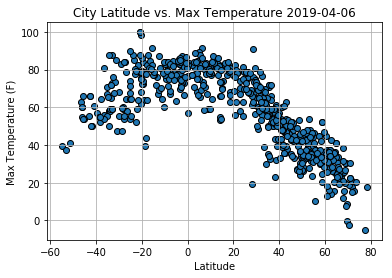

In [13]:
#set plot variables
x = cities_df[['Lat']]
y = cities_df[['Max Temp']]

#get the date from the first value of the dataframe to apply it to the chart
date = cities_df['Date'].loc[1]
date = datetime.date()

#write plot
plt.scatter (x,y, edgecolor = 'black')
plt.grid()

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("Lat_vs_MaxTemp.png")

plt.show()

#### Latitude vs. Humidity Plot

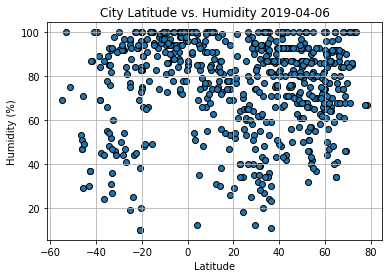

In [14]:
#set plot variables
x = cities_df[['Lat']]
y = cities_df[['Humidity']]

#get the date from the first value of the dataframe to apply it to the chart
date = cities_df['Date'].loc[1]
date= datetime.date()

#plot the data
plt.scatter (x,y, edgecolor = 'black')
plt.grid()

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("lat_vs_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

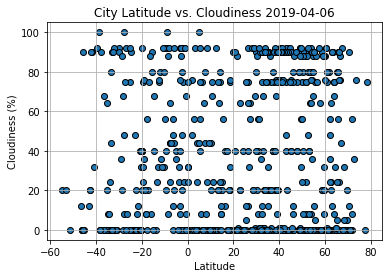

In [15]:
#set plot variables
x = cities_df[['Lat']]
y = cities_df[['Cloudiness']]

#get the date from the first value of the dataframe to apply it to the chart
date = cities_df['Date'].loc[1]
date= datetime.date()

#plot the data
plt.scatter (x,y, edgecolor = 'black')
plt.grid()

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

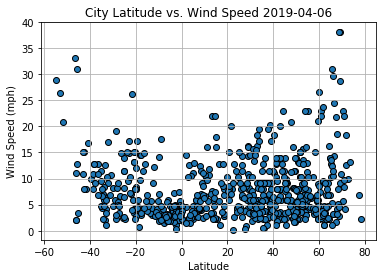

In [16]:
#set plot variables
x = cities_df[['Lat']]
y = cities_df[['Wind speed']]

#get the date from the first value of the dataframe to apply it to the chart
date = cities_df['Date'].loc[1]
date= datetime.date()

#plot the data
plt.scatter (x,y, edgecolor = 'black')
plt.grid()

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("Lat_vs_windSpeed.png")

plt.show()